## Data Science & Business Analytics Internship at The Sparks Foundation

### TASK 2 - Prediction using Unsupervised Machine Learning 

### The task is to predict the optimum number of clusters from the 'Iris' dataset and represent it visually

##### Author: Ketaki Pardikar

#### Steps to be followed:
#### Step 1 - Importing the dataset
#### Step 2 - Visualising the data 
#### Step 3 - Finding the optimum number of clusters
#### Step 4 - Applying k means clustering on the data
#### Step 5 - Visualising the clusters

# Step 0: Importing Libraries that need to perform task

In [23]:
# Importing all the libraries needed in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

# To ignore the warnings 
import warnings
warnings.filterwarnings('ignore')

# Step 1 : Reading the dataset

In [10]:
dataset=pd.read_csv("D:\Python Learning\Iris.csv")

In [11]:
dataset.head() # loads the first five rows of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
dataset.tail() # loads the last five rows of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Step 2 : Visualize the dataset

In [26]:
dataset.shape # Number of elements in each dimension of an array

(150, 4)

In [27]:
dataset.columns # Gives the Heading of Column 

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [15]:
dataset.describe() # Gives the statistical data  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
dataset.info() # Gives the concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# STEP 3: Finding the optimum number of clusters
We need to specify the number of clusters,Before clustering the data using kmeans,To find the minimum number of clusters, there are various methods available like **Silhouette Coefficient and the Elbow method. Here, the elbow method is used.

Silhouette Coefficient:Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]

Elbow Method:In this method, the number of clusters are varies within a certain range. For each number, within-cluster sum of square (wss) value is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the 2d plot indicates the appropiate number of clusters.

In [37]:
x = dataset.iloc[:, [0, 1, 2, 3]].values


within_cluster_sum_of_square = []

clusters_range = range(1,11)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    within_cluster_sum_of_square.append(km.inertia_)

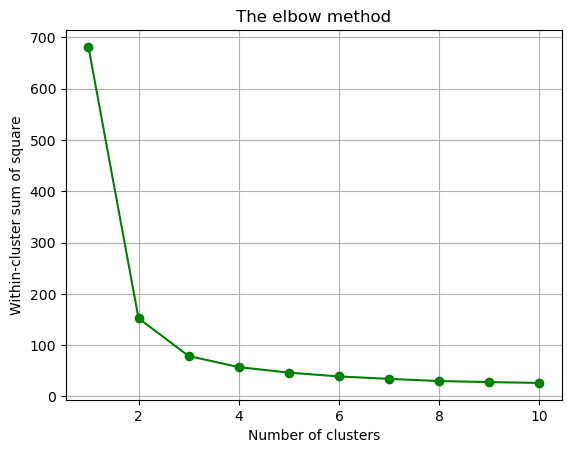

In [17]:
plt.plot(clusters_range, within_cluster_sum_of_square, 'go-', color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

We can clearly see why it is called 'The Elbow Method' because from the above graph the optimum cluster is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

So from this we choose the number of clusters as **3**

# STEP 4: Applying k means clustering on the data

In [18]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(dataset)

In [19]:
x = dataset.iloc[:, [0, 1, 2, 3]].values

# STEP 5 : Visualising the Clusters

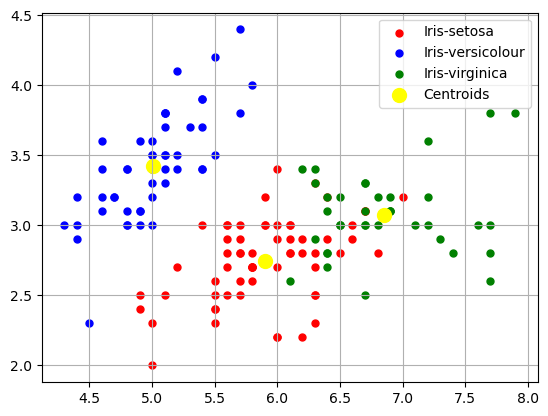

In [20]:
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

<AxesSubplot:>

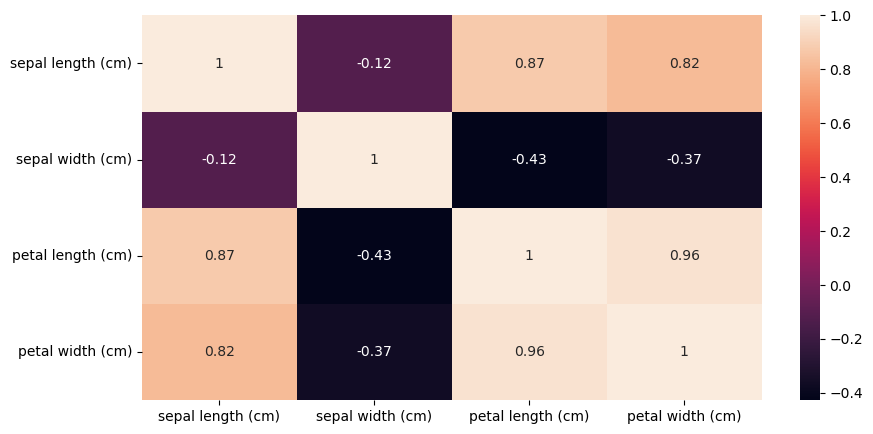

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), annot=True)

So from this Heatmap we can able to see scaler which shows - 0.4 that shows the numbers below -0.4 which is lowest and 1 in the scaler shows the numbers above the 1 or equal to 1.

So this Heatmap indicates different length and width size of Petals And Sepals of different Clusters

**Thankyou